In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pylab as pl

EXPLORACION DE DATOS

In [16]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


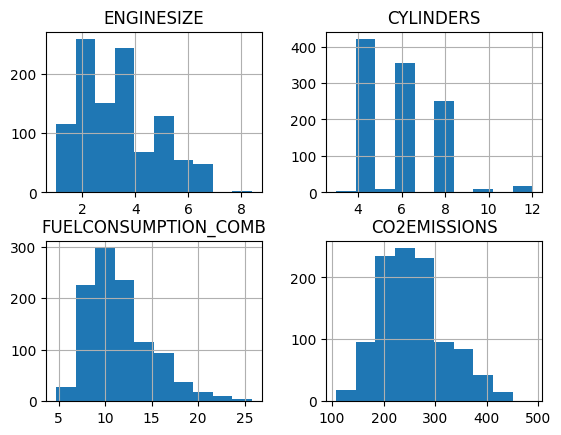

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.hist()
plt.show()

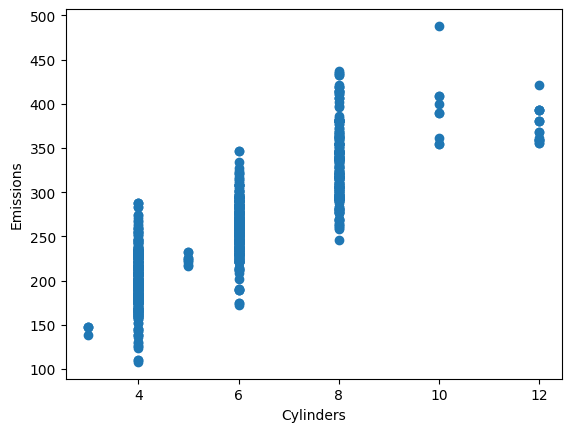

In [10]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS)
plt.xlabel('Cylinders')
plt.ylabel('Emissions')
plt.show()

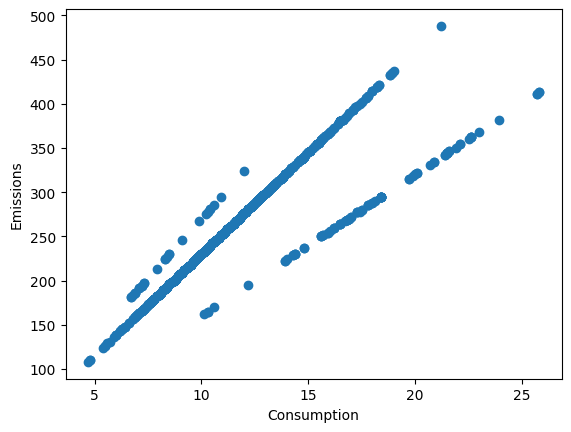

In [15]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS)
plt.xlabel('Consumption')
plt.ylabel('Emissions')
plt.show()

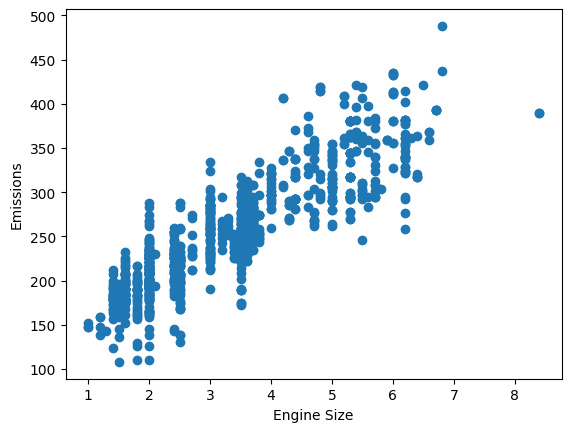

In [13]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [12]:
cdf[['FUELCONSUMPTION_COMB','CO2EMISSIONS']].corr()

,FUELCONSUMPTION_COMB,CO2EMISSIONS
FUELCONSUMPTION_COMB,1.000000,0.892129
CO2EMISSIONS,0.892129,1.000000


TRAIN/TEST SPLIT

In [20]:
# Se divide el Dataset en datos para entrenamiento y datos para prueba
# El modelo se entrena con los datos de entrenamiento y se prueba con los datos de prueba.
# Esto permite determinar el comportamiento del modelo con nuevos datos

# Division de los datos mediante asignacion de un numero random entre 0-1 a cada dato
msk = np.random.rand(len(df)) < .8
train = cdf[msk]
test = cdf[~msk]

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
2,1.5,4,5.9,136
5,3.5,6,10.0,230
11,3.5,6,10.4,239
17,4.7,8,15.4,354
21,2.0,4,9.3,214
...,...,...,...,...
1039,2.0,4,9.2,212
1042,1.4,4,5.4,124
1046,2.5,5,9.8,225
1051,2.0,4,10.7,246


MODELO DE REGRESION LINEAL

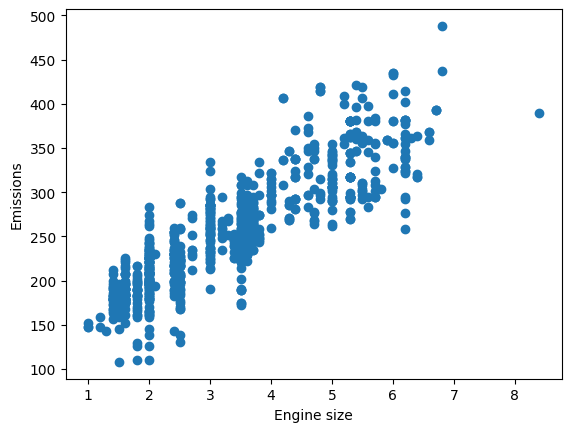

In [30]:
#Graficar los datos de entrenamiento
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.show()

In [33]:
# Modelado con sklearn

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y)

print('Coficientes:', regr.coef_)
print('Intercepto:', regr.intercept_)


Coficientes: [[39.00285673]]
Intercepto: [125.45694743]


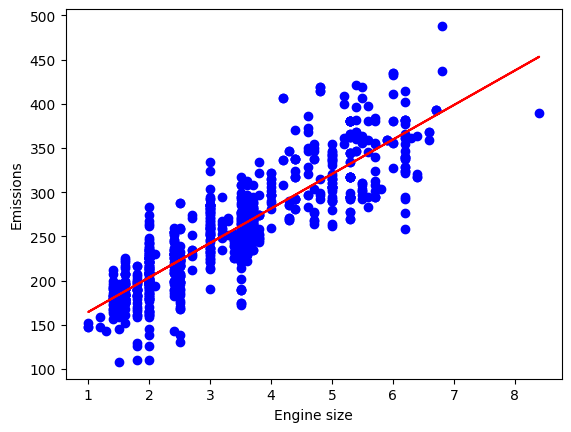

In [34]:
# Graficar datos entrenados

plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,regr.coef_[0][0] * train_x + regr.intercept_[0],'-r')
plt.xlabel('Engine size')
plt.ylabel('Emissions')
plt.show()

EVALUACION

In [35]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

yhat = regr.predict(test_x)

print('MAE: %.2f' % np.mean(np.absolute(yhat - test_y)))
print('RMSE: %.2f' %np.mean((yhat - test_y)**2))
print('R^2: %.2f' % r2_score(test_y,yhat))

MSE: 22.11
RMSE: 830.80
R^2: 0.79


In [36]:
# EJEMPLO

train_x = train[['FUELCONSUMPTION_COMB']]
test_x = test[['FUELCONSUMPTION_COMB']]

regr = LinearRegression()
regr.fit(train_x,train_y)

predictions = regr.predict(test_x)

print('MAE: %.2f' % np.mean(np.absolute(predictions - test_y)))



MAE: 19.23
